In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#read the data set
data = pd.read_csv("train.csv")

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#convert to numpy array
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([2, 7, 1, ..., 4, 9, 3], dtype=int64)

In [6]:
X_train[:,0].shape

(784,)

In [7]:
#initialise the parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [8]:
# ReLu initialing
def ReLU(Z):
    return np.maximum(Z, 0)

In [9]:
#get Relu Deravative
def ReLU_deriv(Z):
    return Z > 0

In [10]:
#Softmax activation
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [11]:
# Forward propagition initialing
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [12]:
# Make one hot encoding transforming
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [13]:
#Create the back propagation method
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [14]:
#update the this parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [15]:
# get predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

In [16]:
# Get accuracy
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [17]:
# Calculate the gradiend descent with parameters
def gradient_decent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2 = gradient_decent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 8 ... 8 9 9] [2 7 1 ... 4 9 3]
0.14112195121951218
Iteration:  10
[7 3 2 ... 8 9 0] [2 7 1 ... 4 9 3]
0.2261219512195122
Iteration:  20
[7 0 2 ... 8 9 0] [2 7 1 ... 4 9 3]
0.32990243902439026
Iteration:  30
[7 7 1 ... 3 9 0] [2 7 1 ... 4 9 3]
0.39975609756097563
Iteration:  40
[7 7 1 ... 3 9 3] [2 7 1 ... 4 9 3]
0.44282926829268293
Iteration:  50
[7 7 1 ... 3 9 3] [2 7 1 ... 4 9 3]
0.4832682926829268
Iteration:  60
[7 5 1 ... 6 9 3] [2 7 1 ... 4 9 3]
0.5228536585365854
Iteration:  70
[7 5 1 ... 6 9 3] [2 7 1 ... 4 9 3]
0.5569268292682927
Iteration:  80
[7 5 1 ... 8 9 3] [2 7 1 ... 4 9 3]
0.5880731707317073
Iteration:  90
[7 5 1 ... 8 9 3] [2 7 1 ... 4 9 3]
0.6131219512195122
Iteration:  100
[7 5 1 ... 8 9 3] [2 7 1 ... 4 9 3]
0.6348292682926829
Iteration:  110
[7 5 1 ... 9 9 3] [2 7 1 ... 4 9 3]
0.6551463414634147
Iteration:  120
[7 5 1 ... 9 9 3] [2 7 1 ... 4 9 3]
0.6718780487804878
Iteration:  130
[7 5 1 ... 9 9 3] [2 7 1 ... 4 9 3]
0.6869756097560976
Iteration:  1

In [20]:
# Make prediction
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [21]:
# test the our predictions and ploting
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  7


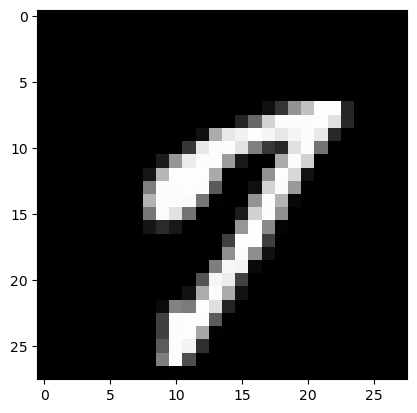

Prediction:  [3]
Label:  3


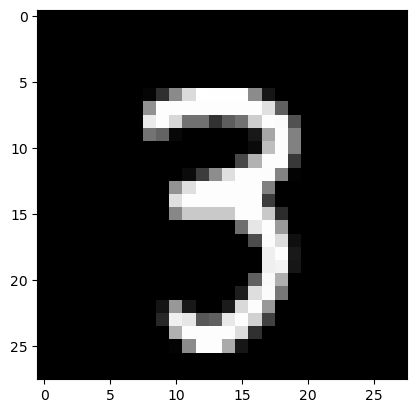

Prediction:  [0]
Label:  0


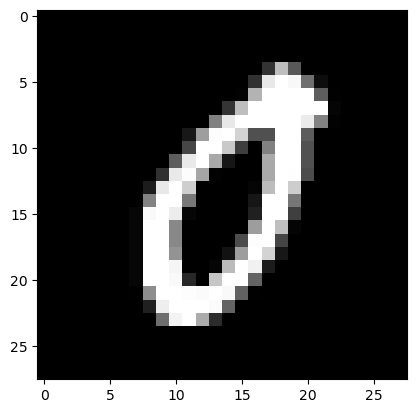

Prediction:  [9]
Label:  9


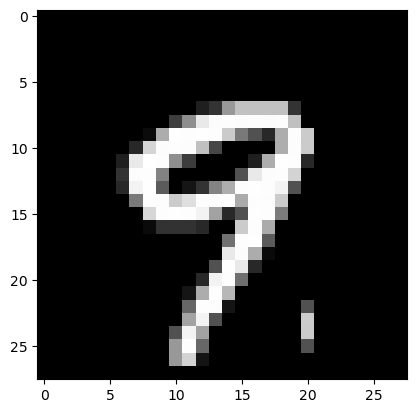

In [23]:
# looking at some predictions
test_prediction(10, W1, b1, W2, b2)
test_prediction(20, W1, b1, W2, b2)
test_prediction(30, W1, b1, W2, b2)
test_prediction(40, W1, b1, W2, b2)